## Import packages

In [20]:
%matplotlib inline
import pandas as pd
from pandas.plotting import lag_plot
import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 6]

### Helper function to get and process the data

In [21]:
def dataget(train_path, test_path):

    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    df = train_data.append(test_data, ignore_index=True)
    Title_Dictionary = {
                        "Capt":         "Officer",
                        "Col":          "Officer",
                        "Major":        "Officer",
                        "Jonkheer":     "Royalty",
                        "Don":          "Royalty",
                        "Sir":          "Royalty",
                        "Dr":           "Officer",
                        "Rev":          "Officer",
                        "the Countess": "Royalty",
                        "Dona":         "Royalty",
                        "Mme":          "Mrs",
                        "Mlle":         "Miss",
                        "Ms":           "Mrs",
                        "Mr":           "Mr",
                        "Mrs":          "Mrs",
                        "Miss":         "Miss",
                        "Master":       "Master",
                        "Lady":         "Royalty"
                        }
    df['Title'] = df['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])
    df['Embarked'].fillna('C', inplace=True)
    means = df.groupby('Title')['Age'].mean()
    map_means = means.to_dict()
    idx_nan_age = df[df['Age'].isnull()]['Age'].index
    for idx in idx_nan_age:
        df.loc[idx, 'Age'] = map_means[df.loc[idx]['Title']]

    df['Imputed'] = 0
    df.loc[idx_nan_age.values, 'Imputed'] = 1
    df['Title'] = pd.Categorical(df['Title'])
    df['Sex'] = pd.Categorical(df['Sex'])
    df['Pclass'] = pd.Categorical(df['Pclass'])
    df['SibSp'] = pd.Categorical(df['SibSp'])
    df['Parch'] = pd.Categorical(df['Parch'])
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].mean()
    df = df.drop(columns=['Cabin', 'Name', 'Ticket'])
    #df = df.drop(columns=['Title', 'SibSp', 'Imputed', 'Pclass', 'Parch', 'Embarked', 'Fare'])
    df = df.round(2)
    original = df.copy()
    df = pd.get_dummies(df, drop_first=True)
    test_data = df[df.Survived.isnull()]
    test_data = test_data.drop(columns=['Survived'])
    train_data = df.dropna()
    train_data = train_data.drop(columns=['PassengerId'])

    return original, train_data, test_data

In [22]:
train_path = 'train.csv'
test_path = 'test.csv'
original, train_data, test_data = dataget(train_path, test_path)
df = original.copy()
df.drop(columns=['PassengerId'], inplace=True)
#df.dropna(inplace=True)
columns = df.columns
print(df.head(10))

     Age Embarked   Fare Parch Pclass     Sex SibSp  Survived   Title  Imputed
0  22.00        S   7.25     0      3    male     1       0.0      Mr        0
1  38.00        C  71.28     0      1  female     1       1.0     Mrs        0
2  26.00        S   7.92     0      3  female     0       1.0    Miss        0
3  35.00        S  53.10     0      1  female     1       1.0     Mrs        0
4  35.00        S   8.05     0      3    male     0       0.0      Mr        0
5  32.25        Q   8.46     0      3    male     0       0.0      Mr        1
6  54.00        S  51.86     0      1    male     0       0.0      Mr        0
7   2.00        S  21.08     1      3    male     3       0.0  Master        0
8  27.00        S  11.13     2      3  female     0       1.0     Mrs        0
9  14.00        C  30.07     0      2  female     1       1.0     Mrs        0


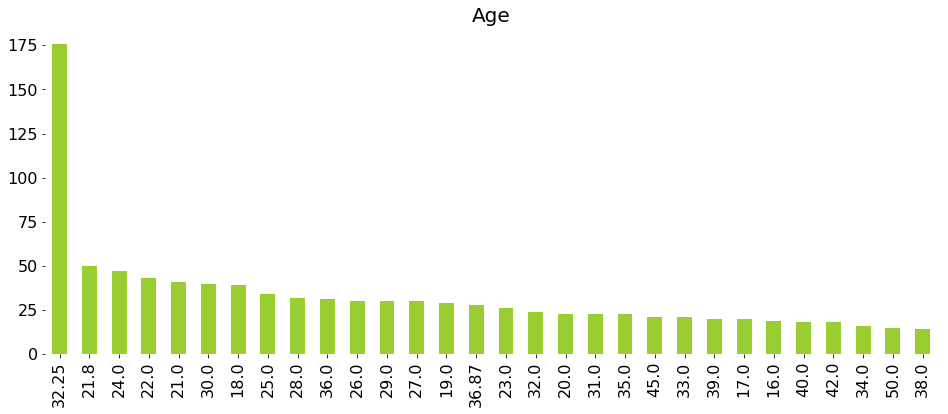

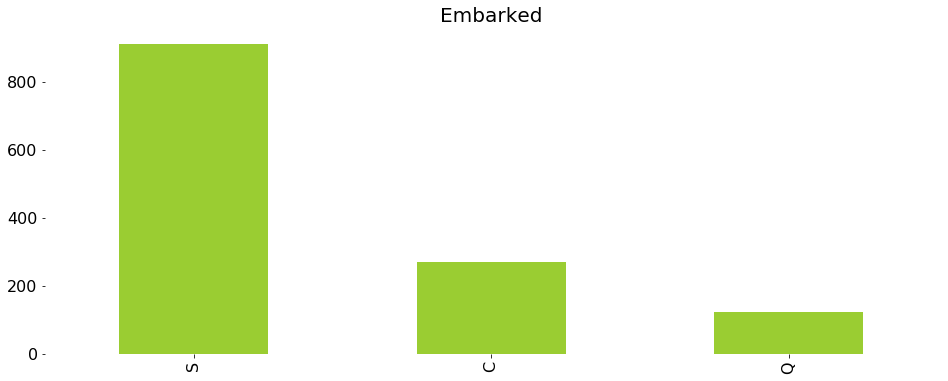

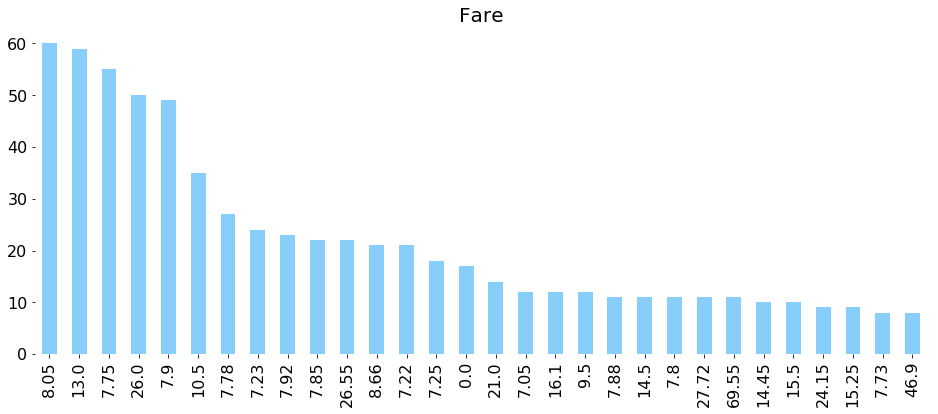

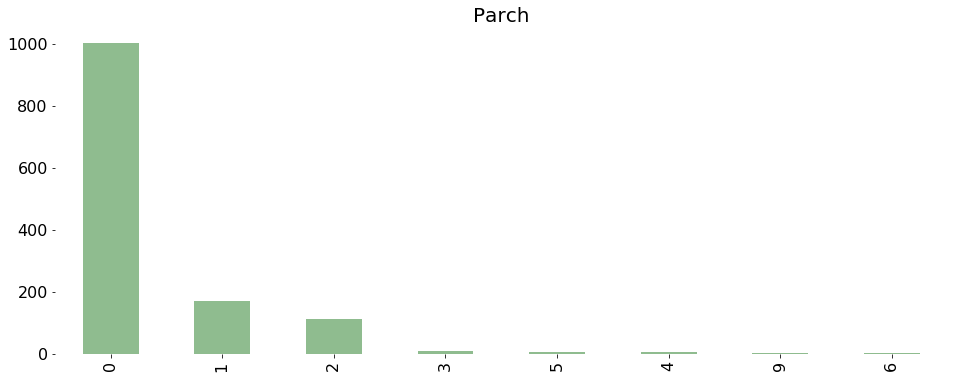

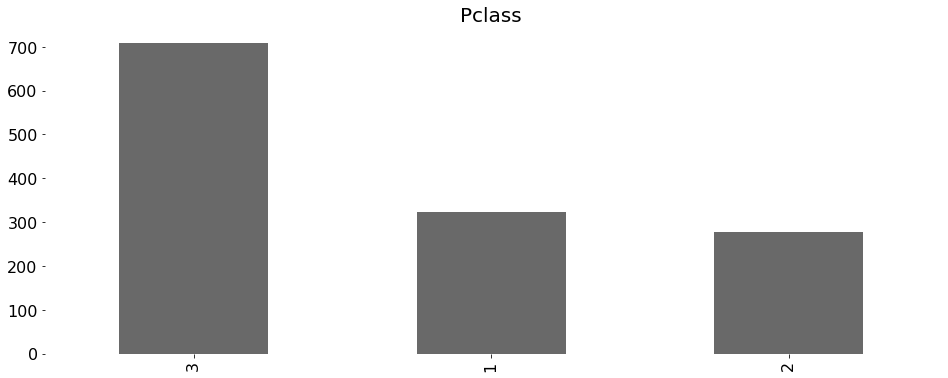

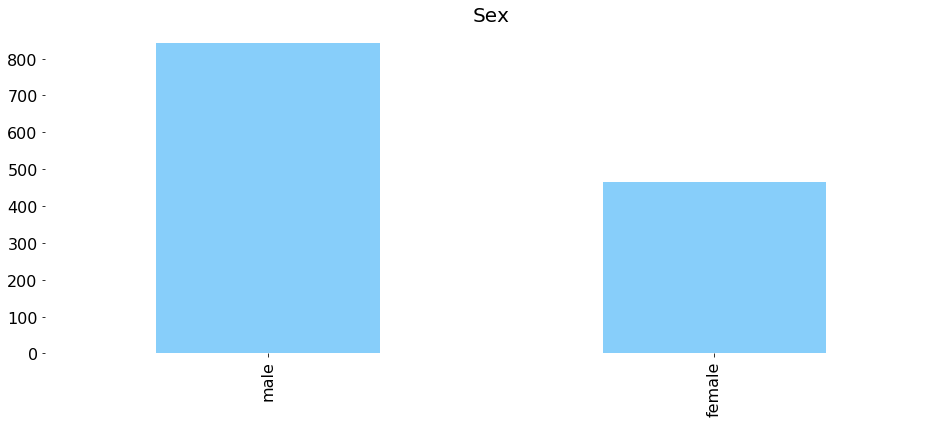

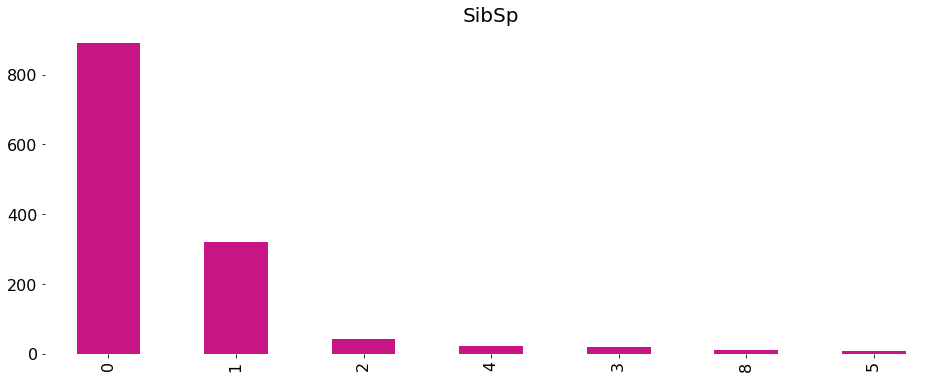

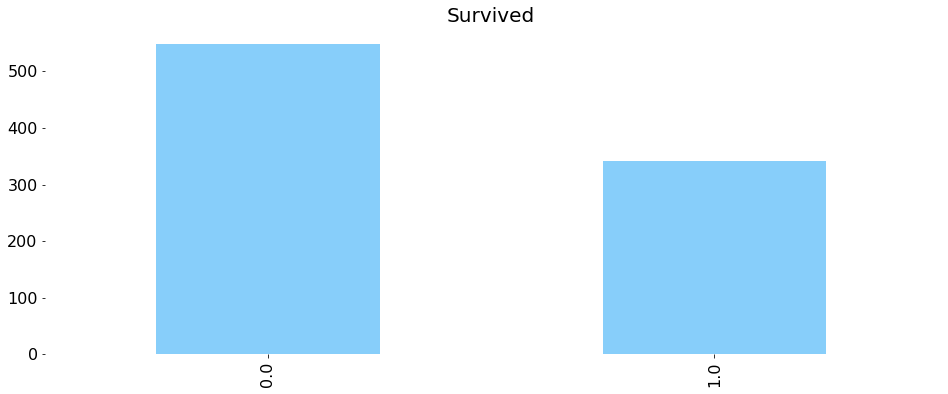

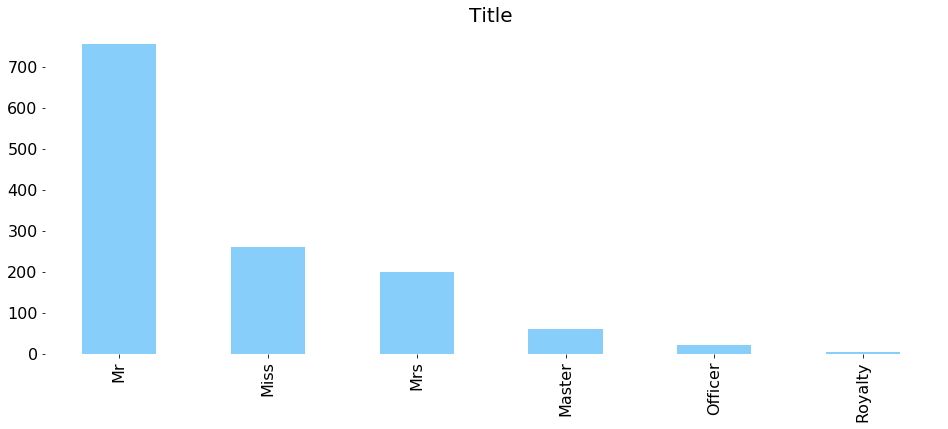

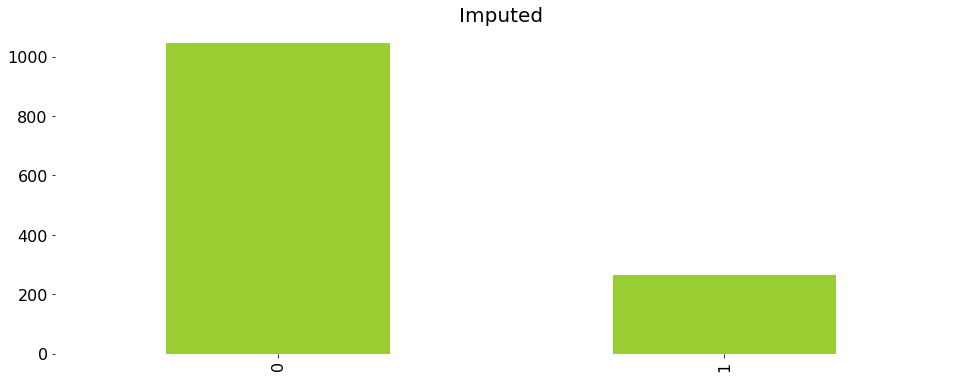

In [23]:
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    ax = df[column].value_counts().head(30).plot.bar(
        color=color,
        fontsize=16,
    )
    ax.set_title(column, fontsize=20)
    sns.despine(bottom=True, left=True)
    plt.show()

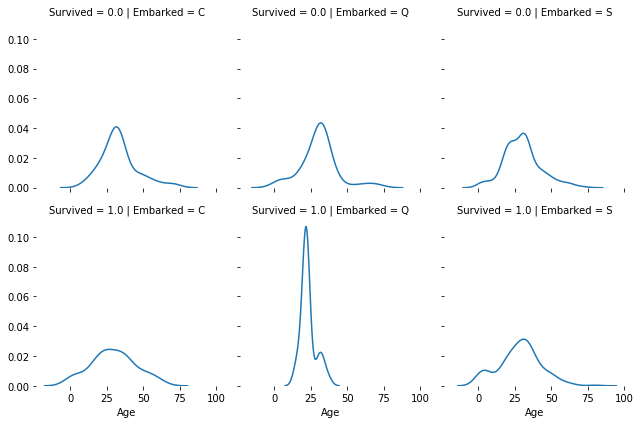

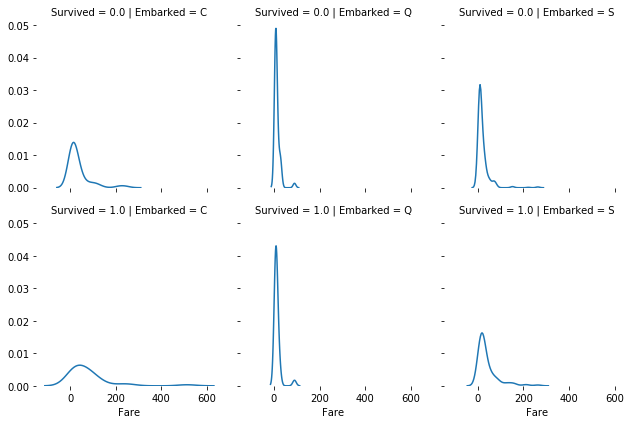

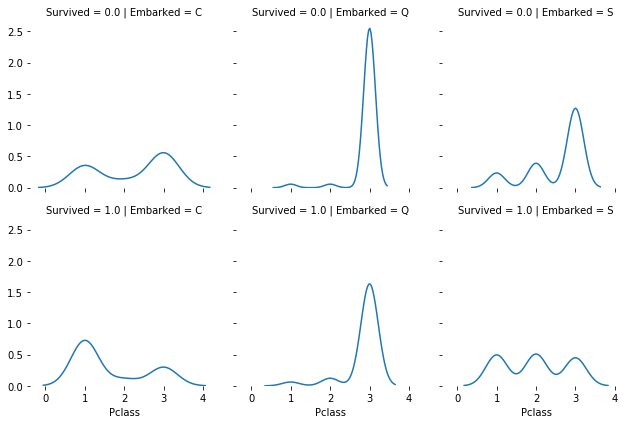

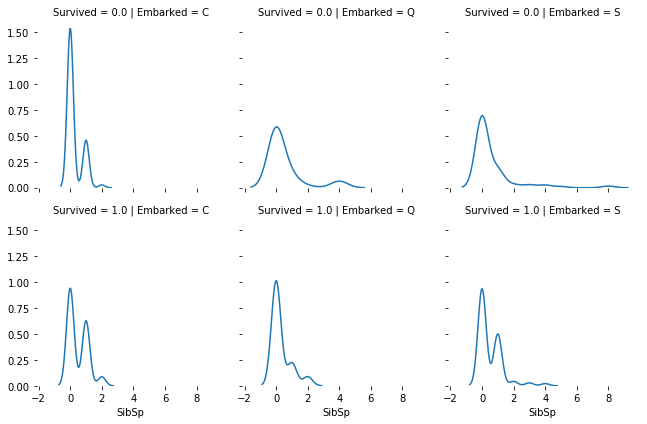

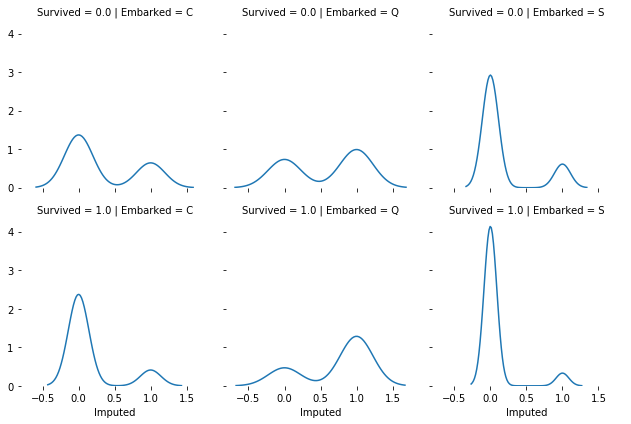

In [24]:
for column in columns:
    colors = ['dimgray', 'brown', 'mediumvioletred', 'orange']
    color = random.choice(colors)
    if column not in ['Survived', 'Embarked','Sex','Title','Parch']:
        ax = sns.FacetGrid(df, row="Survived", col='Embarked')
        ax.map(sns.kdeplot, column)
        sns.despine(bottom=True, left=True)
        plt.show()

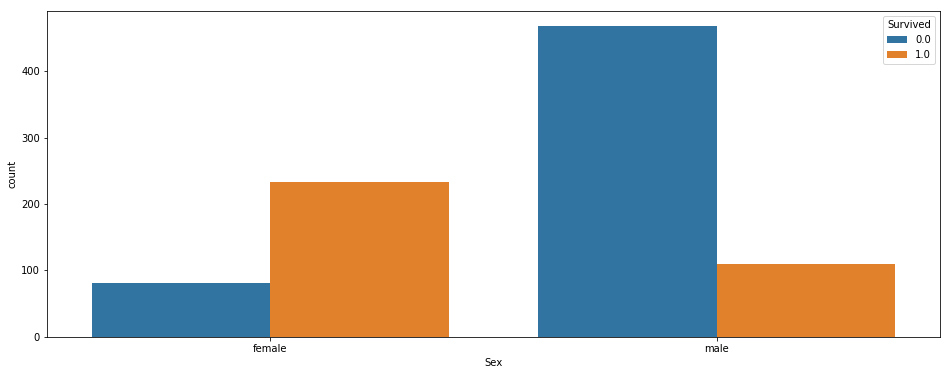

In [25]:
sns.countplot('Sex',hue='Survived',data=df)

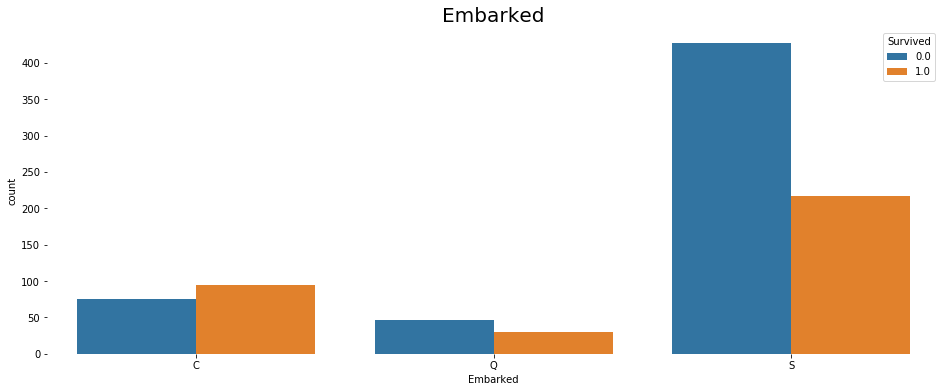

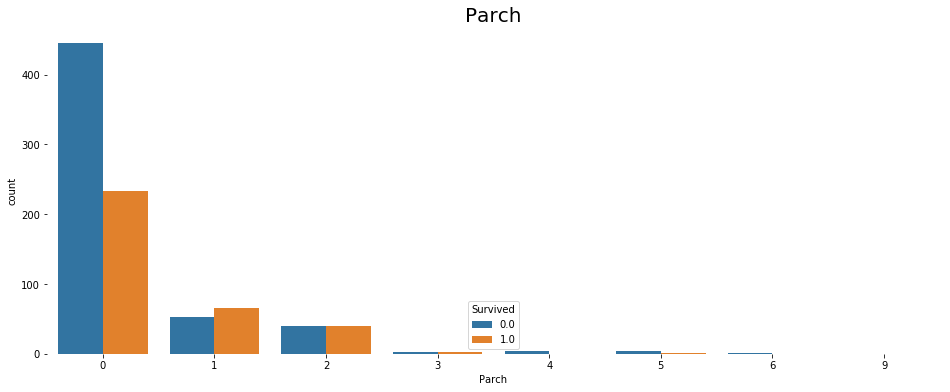

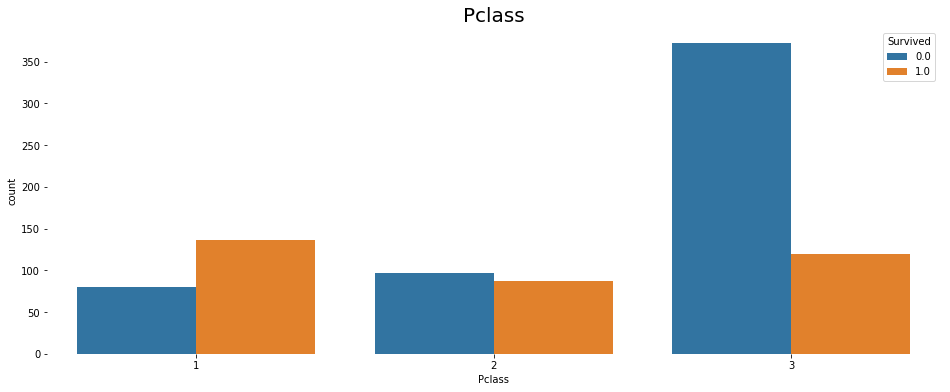

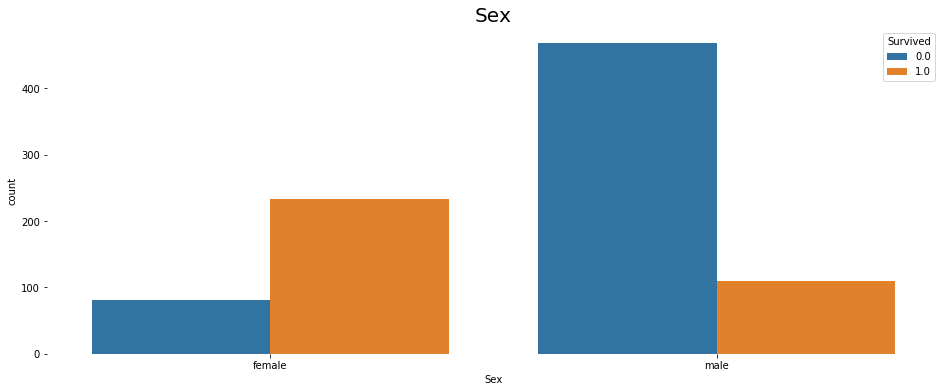

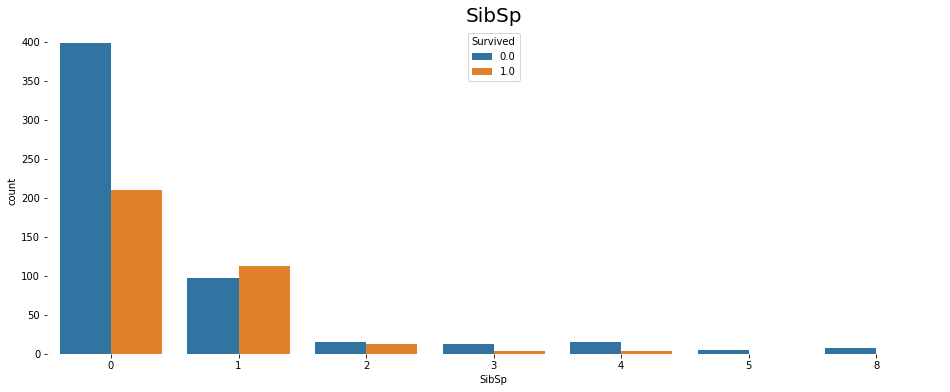

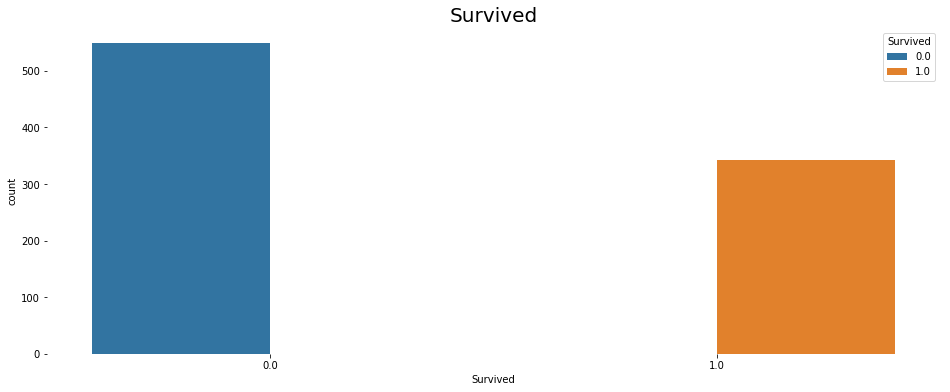

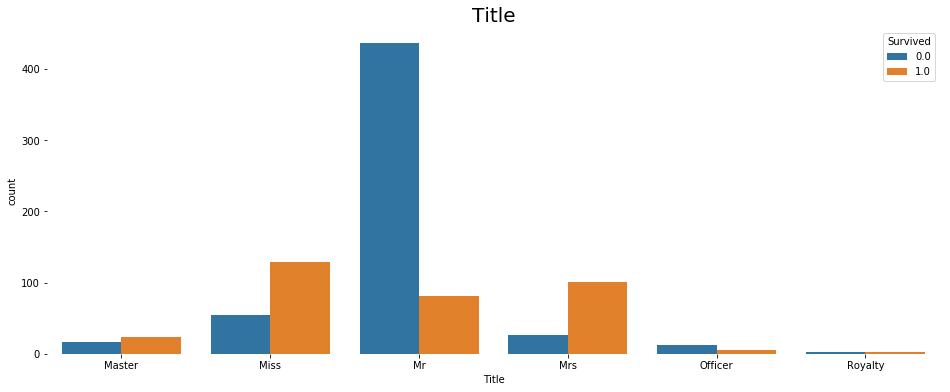

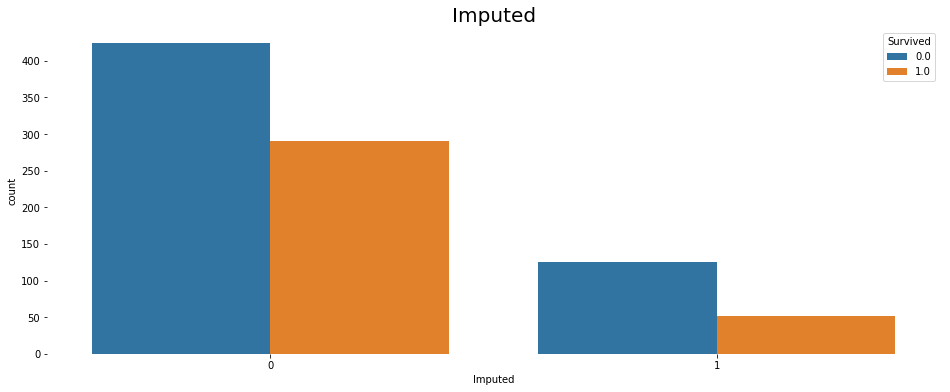

In [26]:
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    if column not in ['Age', 'Fare']:
        ax = sns.countplot(column,hue='Survived',data=df)
        ax.set_title(column, fontsize=20)
        sns.despine(bottom=True, left=True)
        plt.show()

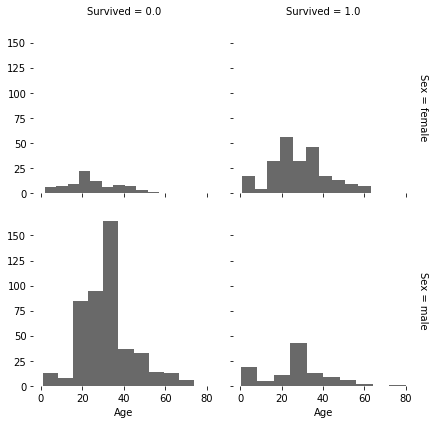

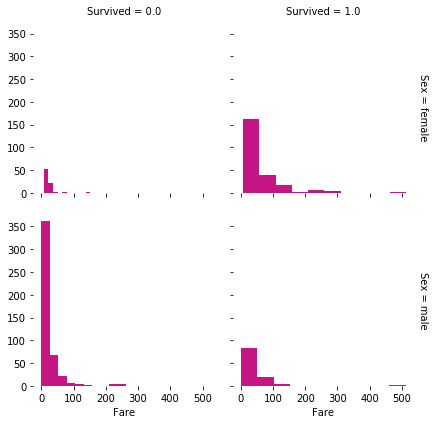

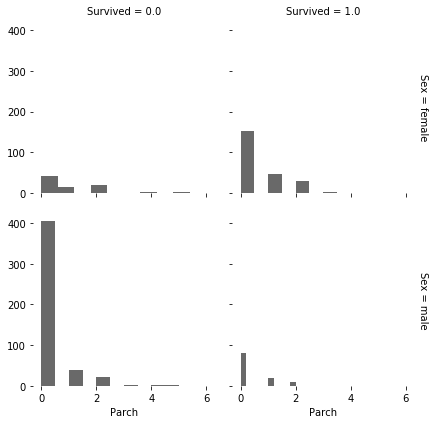

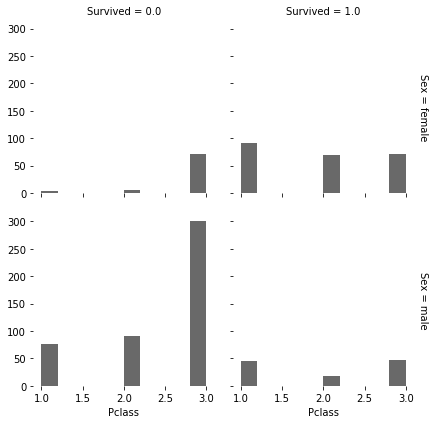

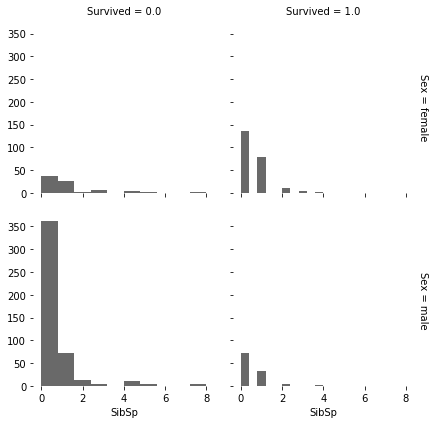

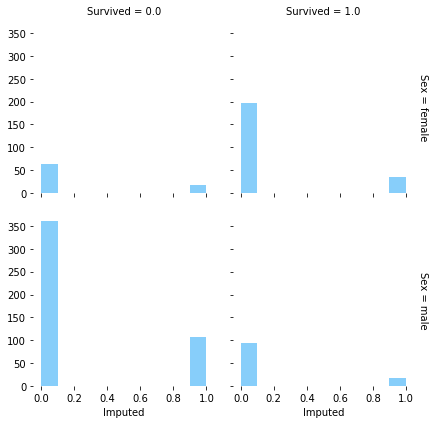

In [27]:
import numpy as np
columns = df.columns
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    bins = np.linspace(0, 60, 13)
    if column not in ['Sex', 'Survived', 'Embarked', 'Title']:
        ax = sns.FacetGrid(df, row="Sex", col="Survived", margin_titles=True)
        ax.map(plt.hist, column, color=color, bins=10, lw=0)
        sns.despine(bottom=True, left=True)
        plt.show()

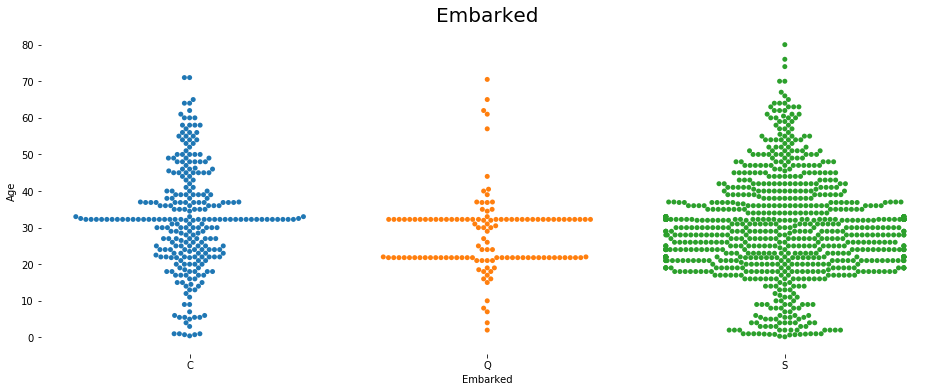

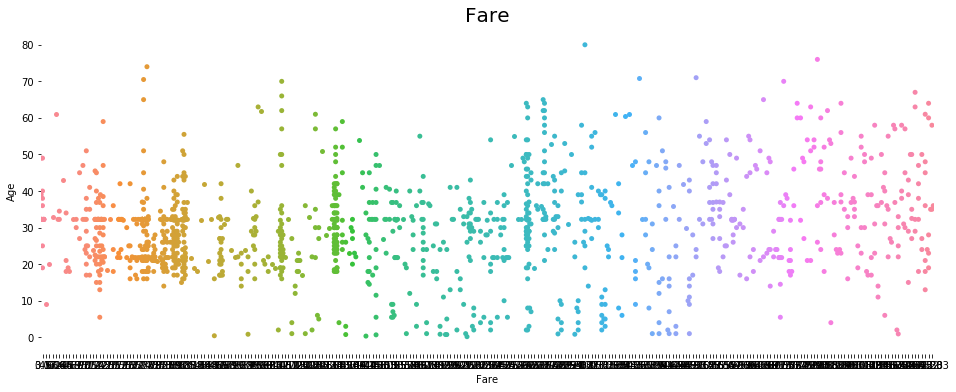

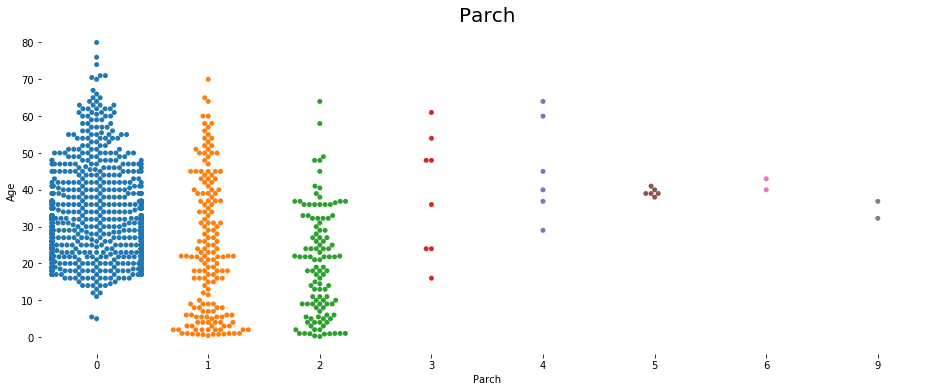

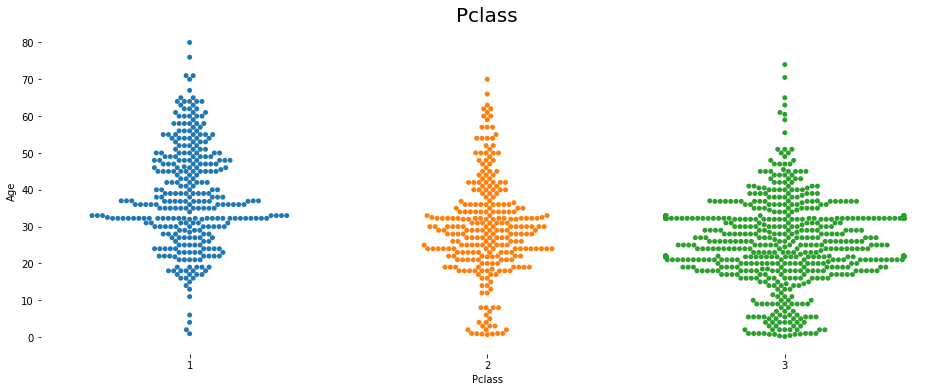

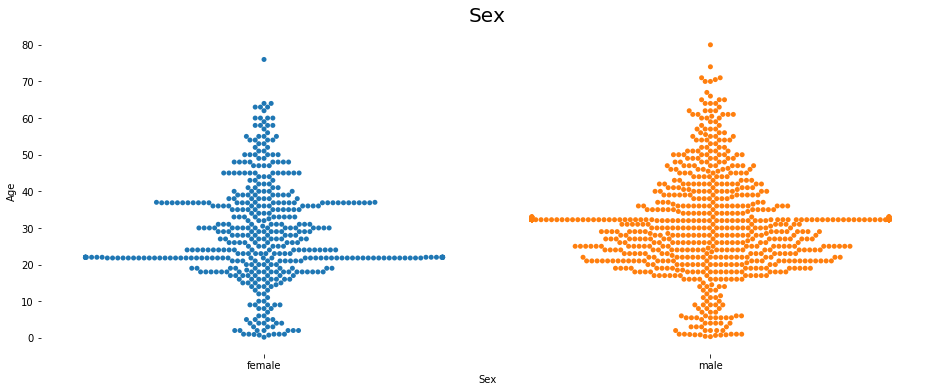

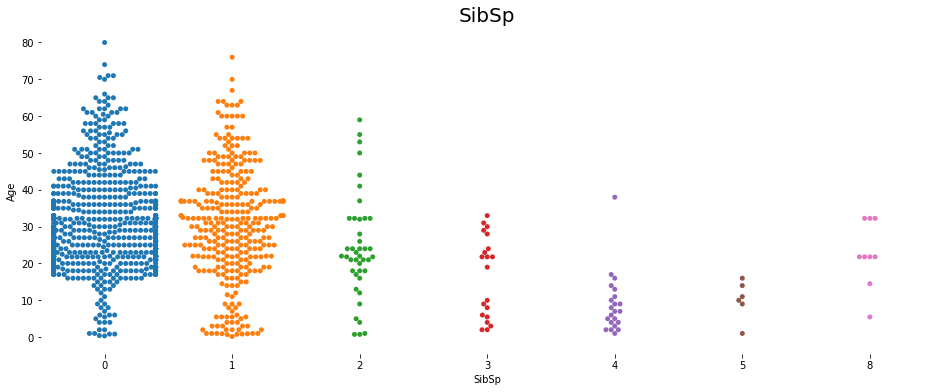

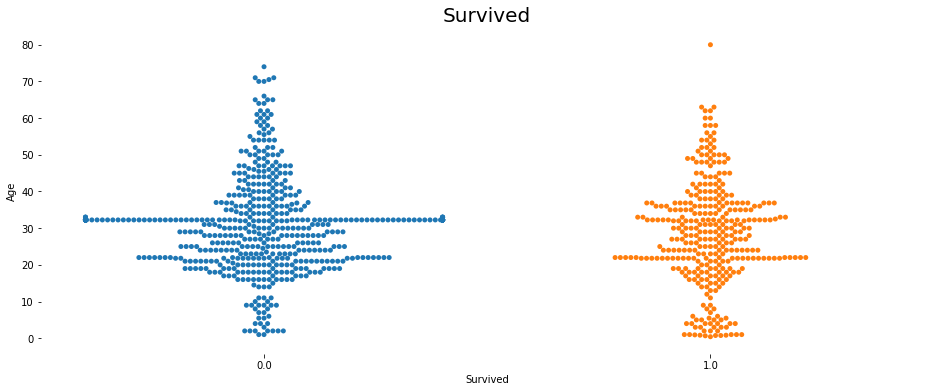

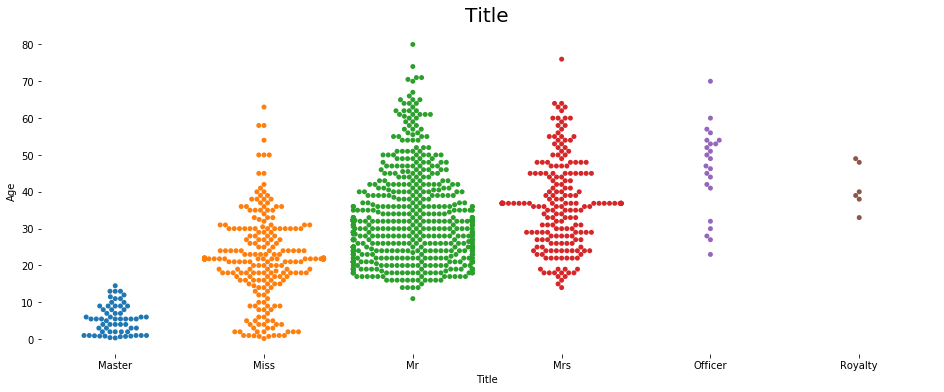

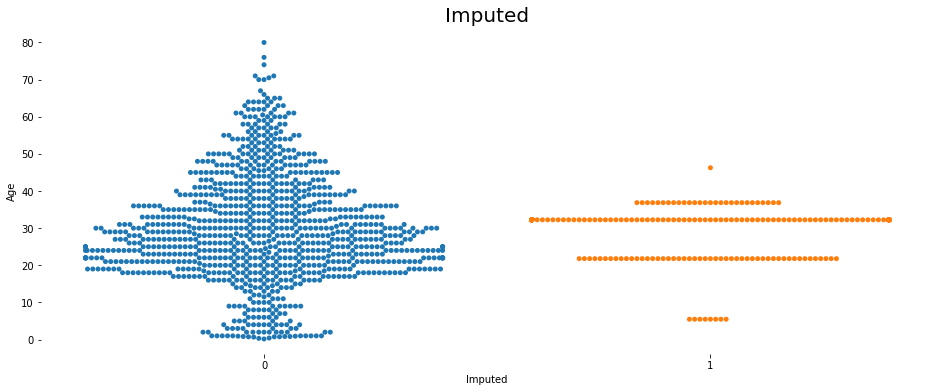

In [28]:
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    if column not in ['Age']:
        ax = sns.swarmplot(x=column, y="Age", data=df)
        ax.set_title(column, fontsize=20)
        sns.despine(bottom=True, left=True)
        plt.show()

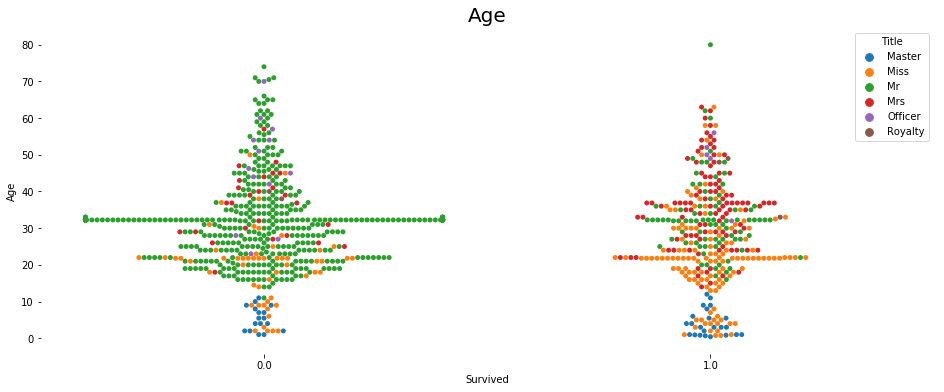

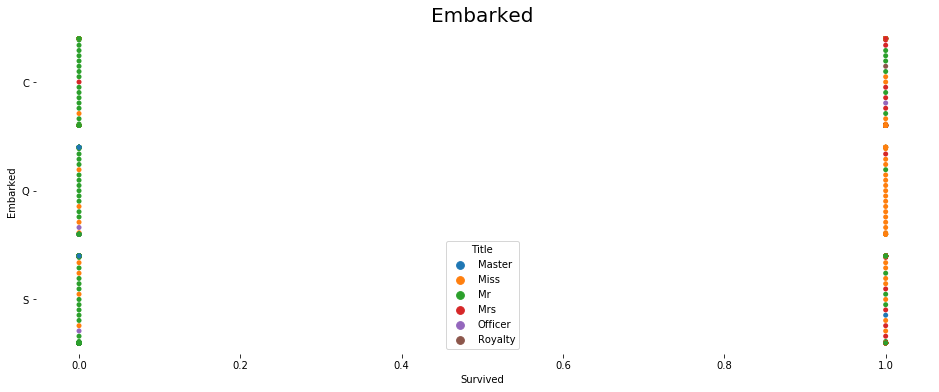

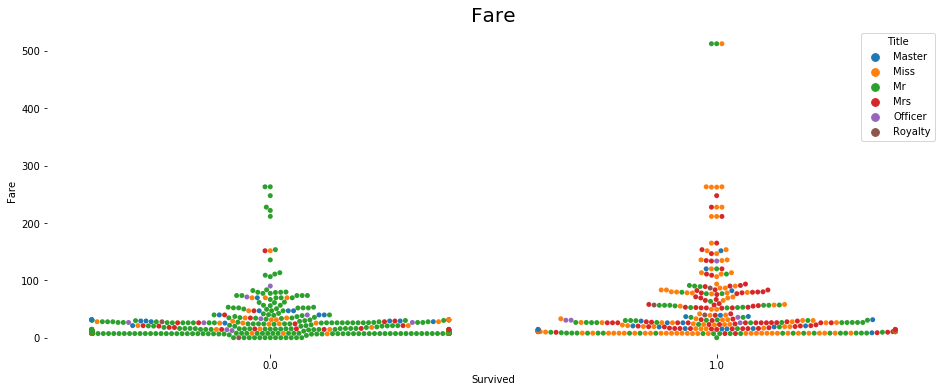

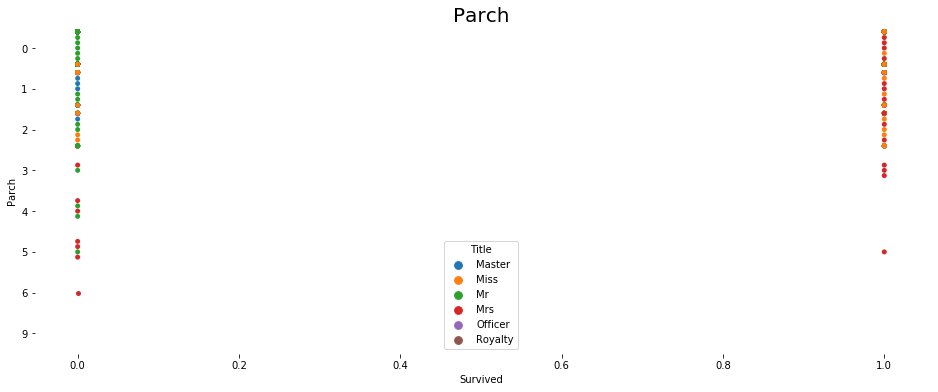

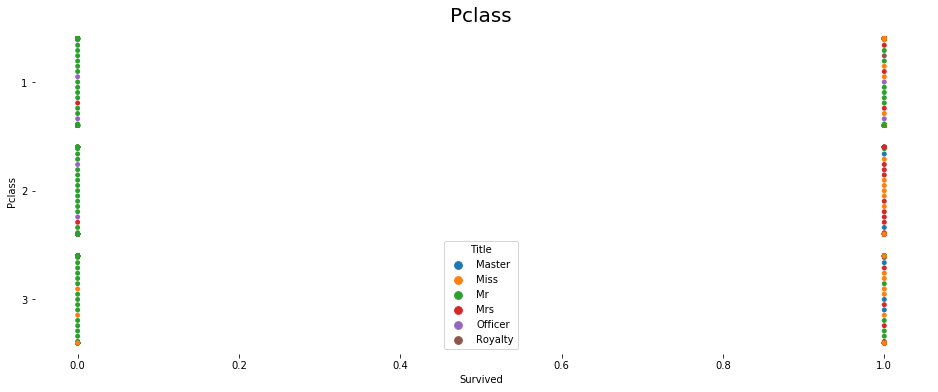

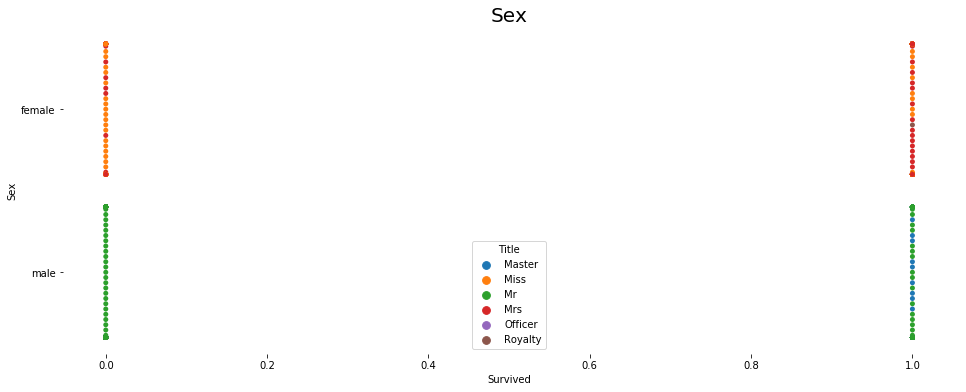

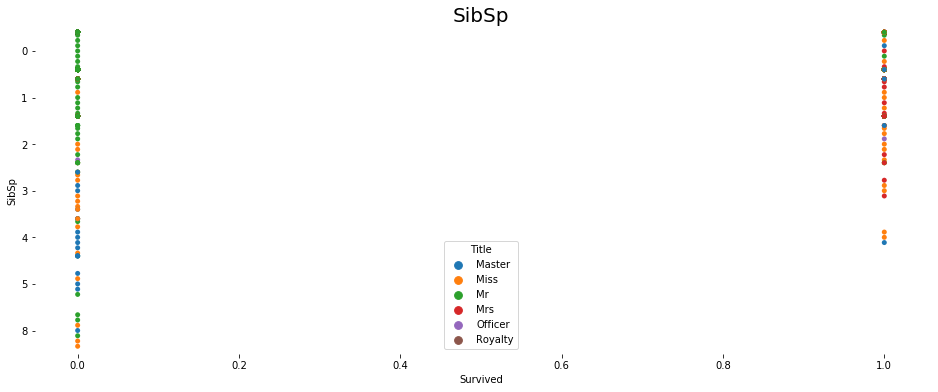

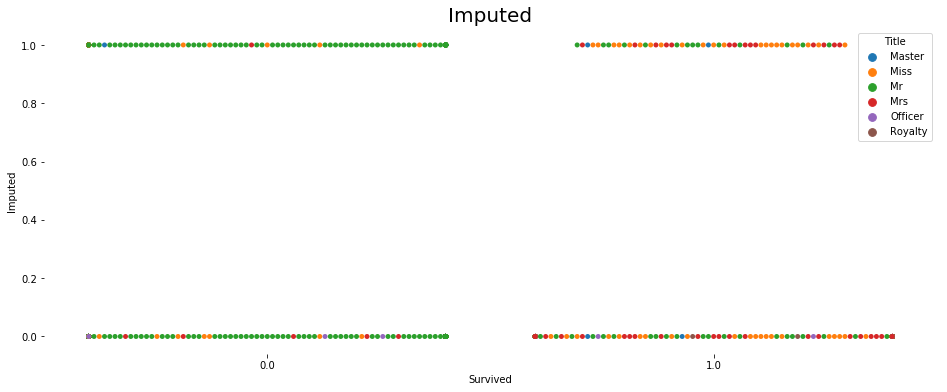

In [29]:
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    if column not in ['Survived', 'Title']:
        ax = sns.swarmplot(x='Survived', y=column, hue='Title', data=df)
        ax.set_title(column, fontsize=20)
        sns.despine(bottom=True, left=True)
        plt.show()

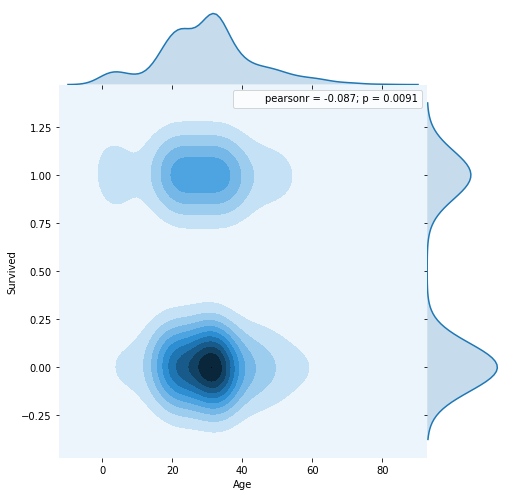

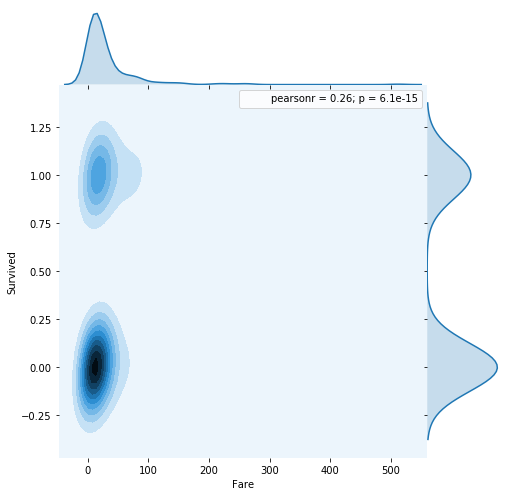

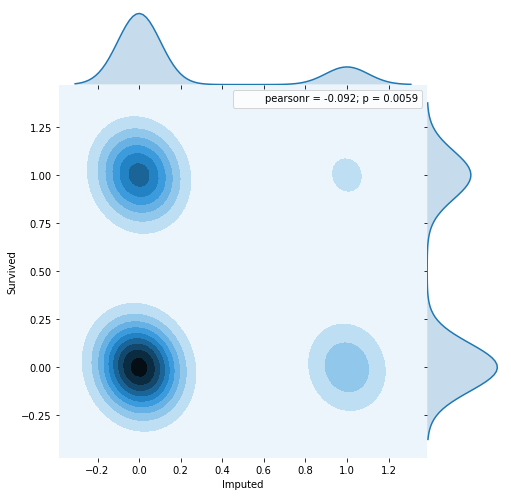

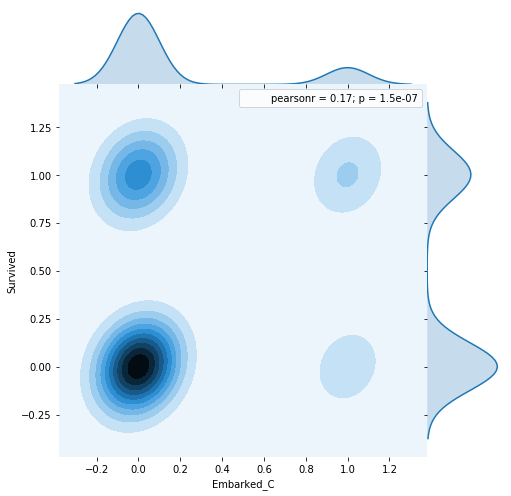

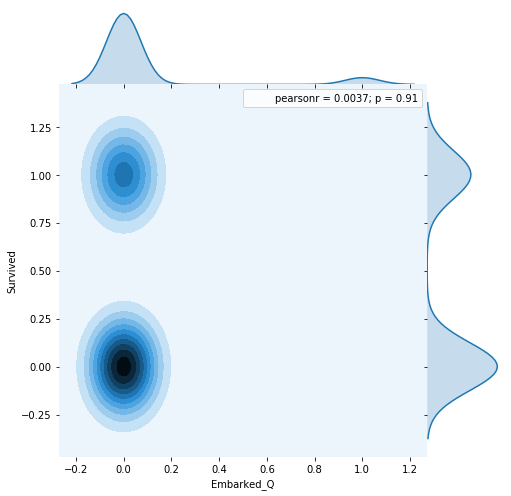

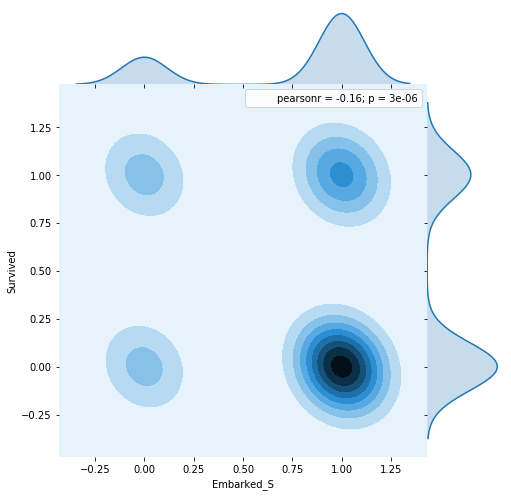

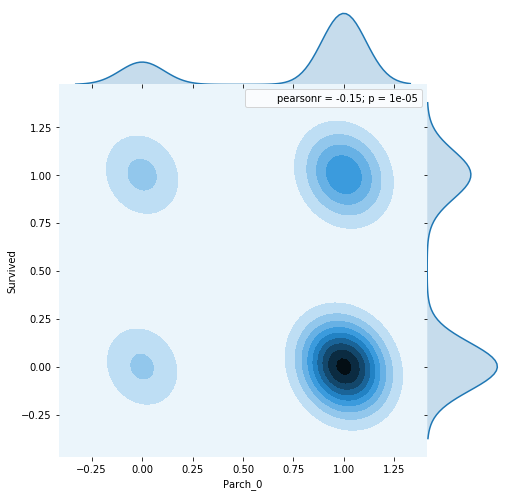

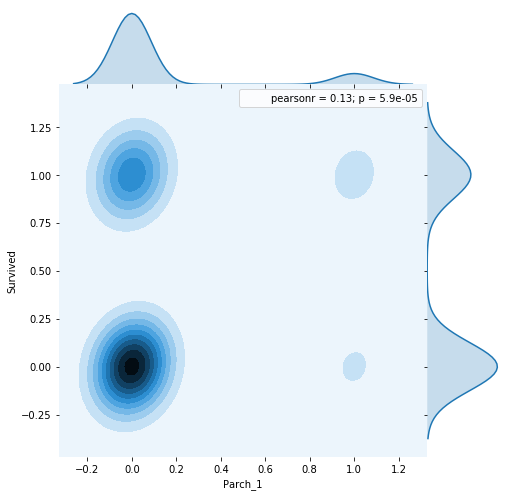

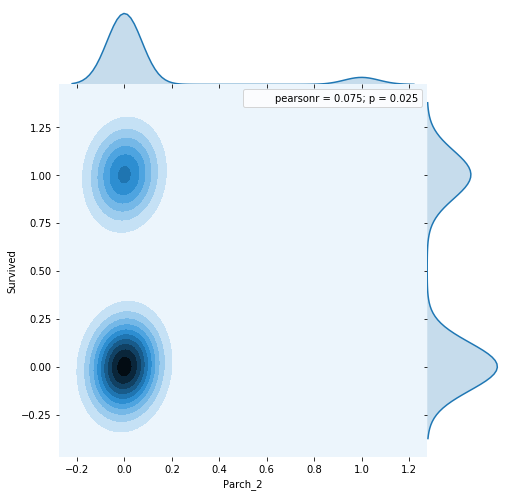

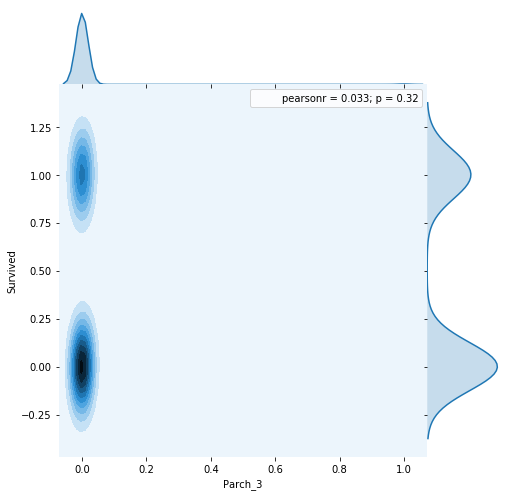

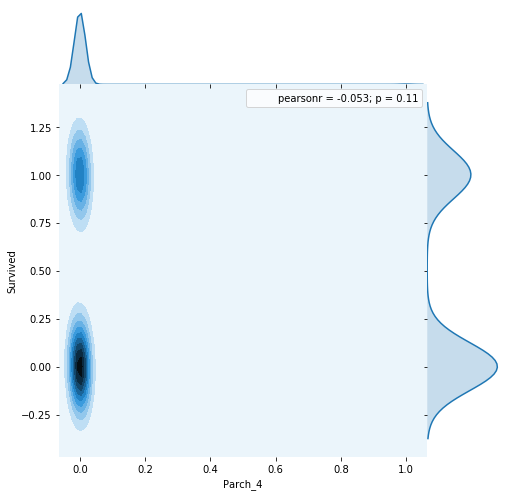

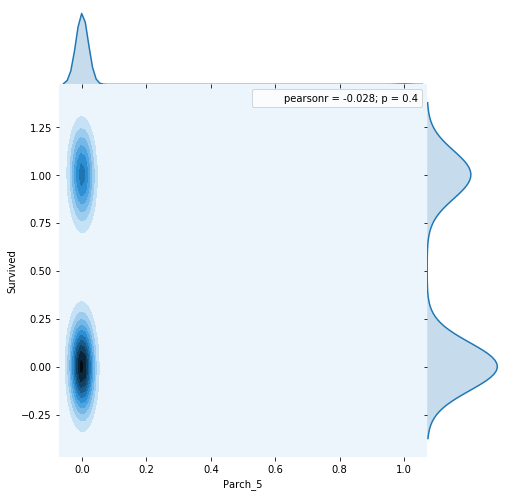

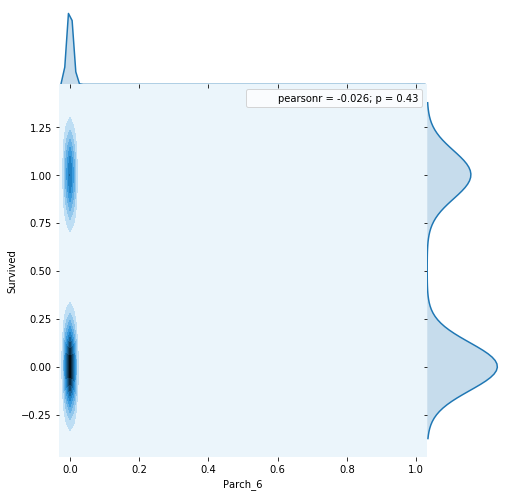

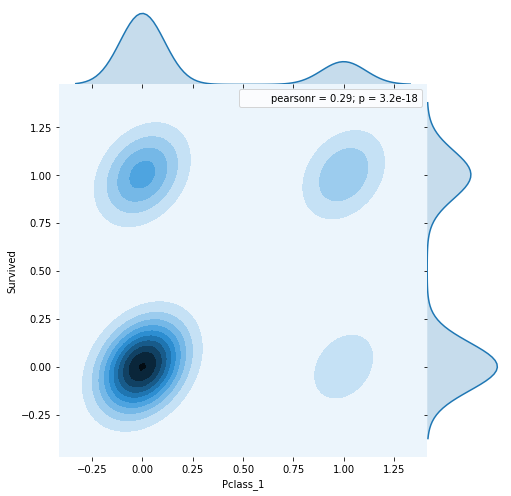

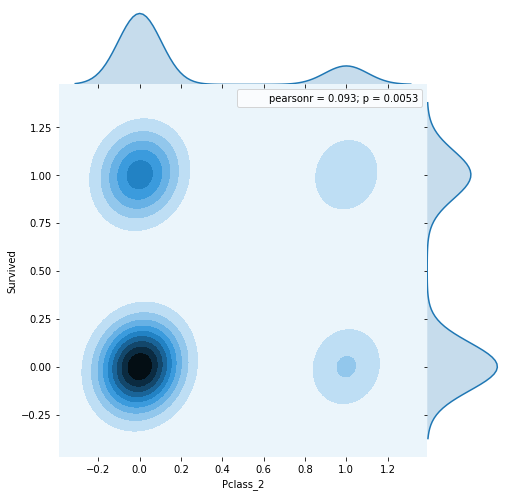

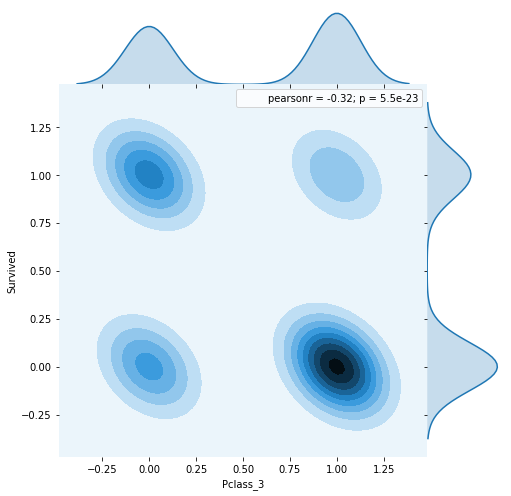

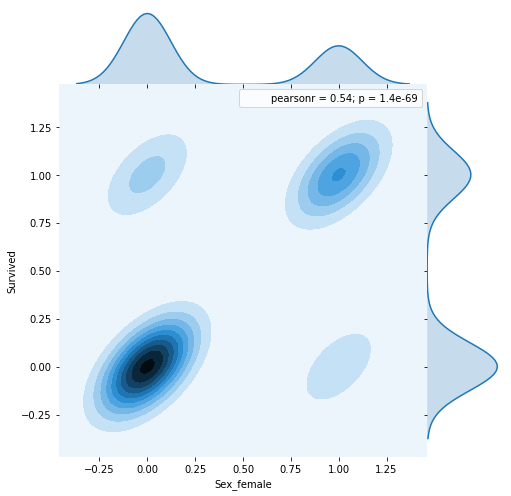

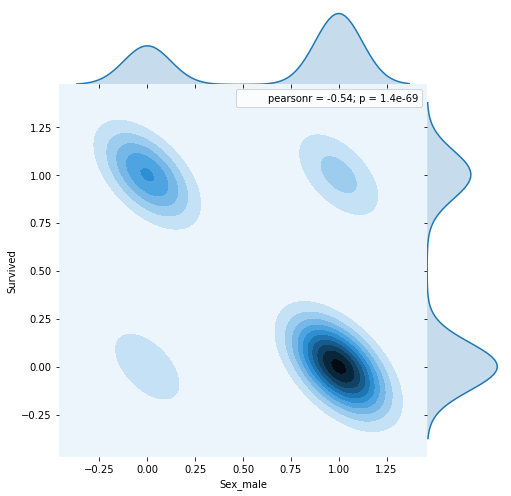

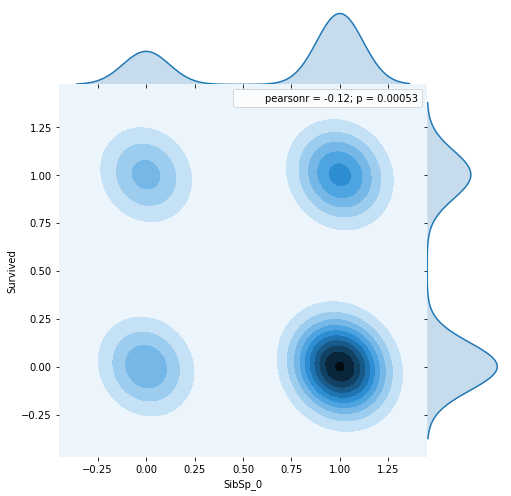

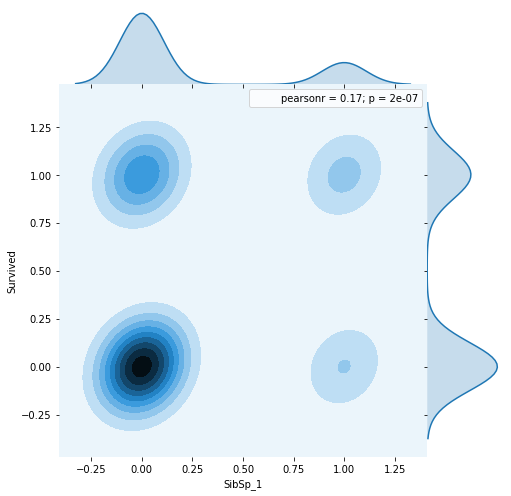

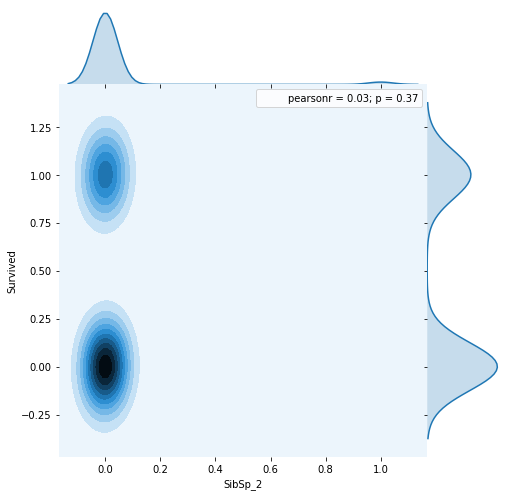

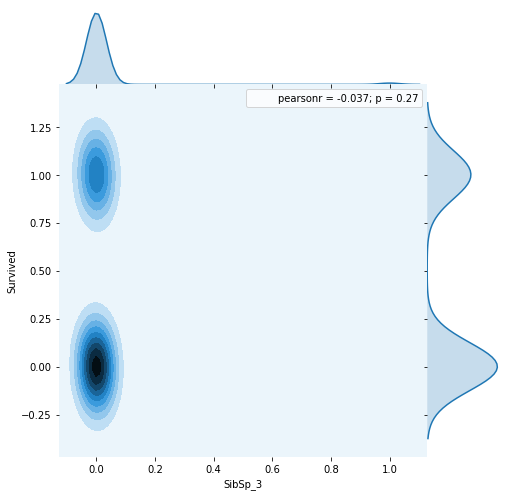

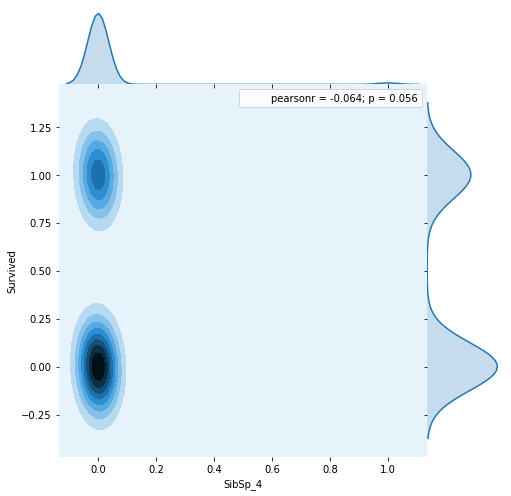

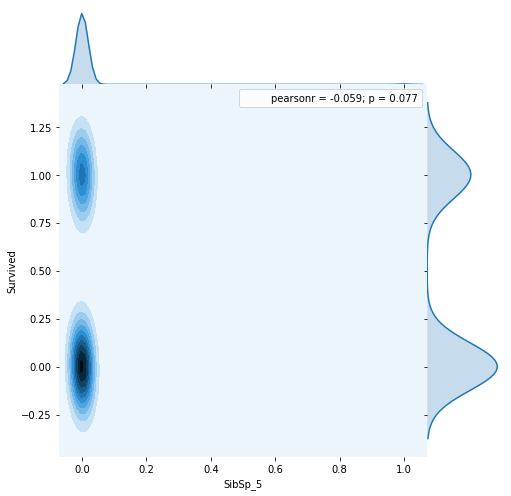

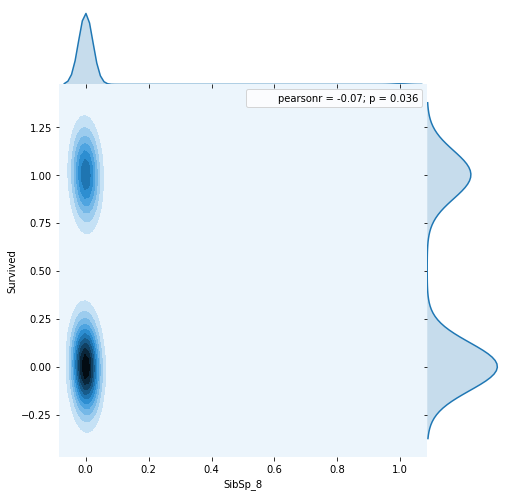

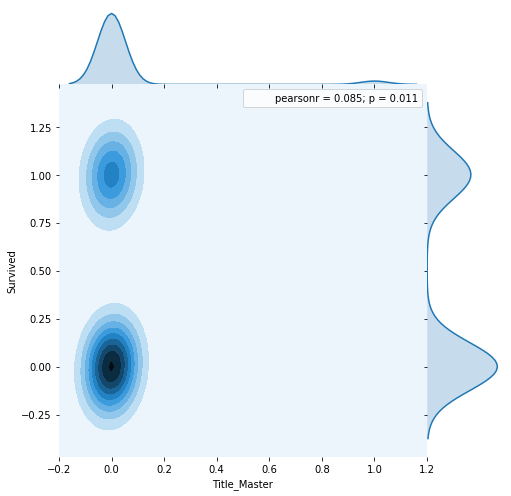

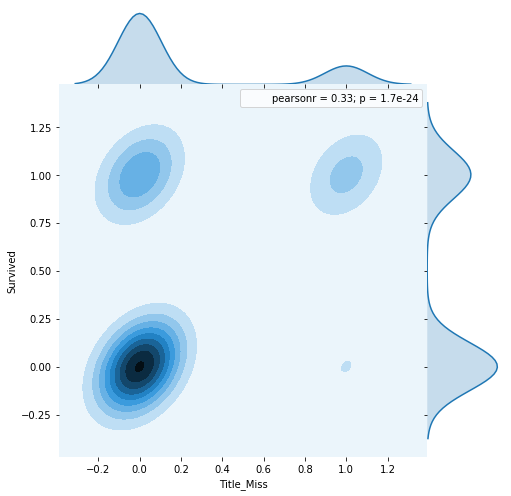

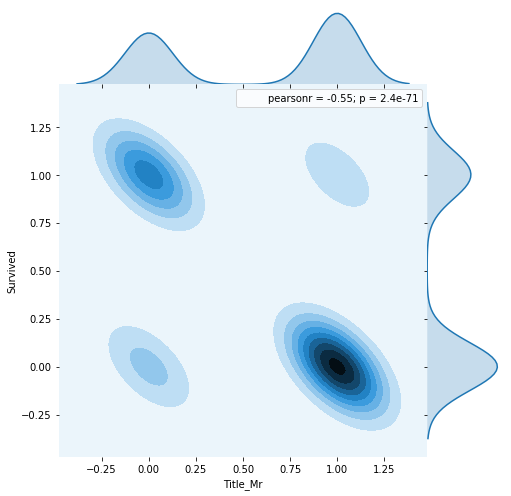

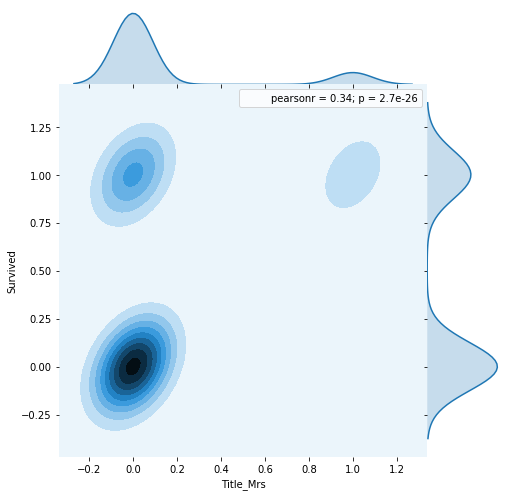

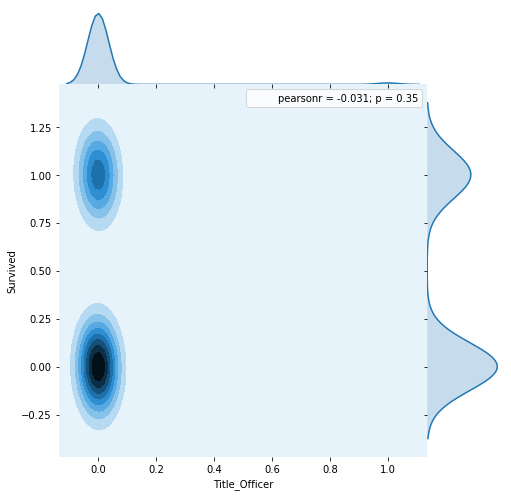

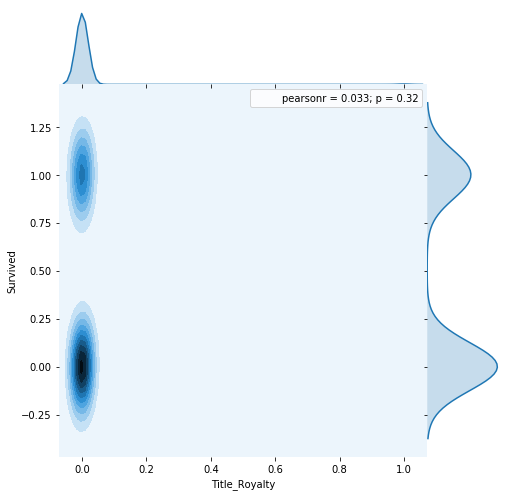

In [30]:
newdf=pd.get_dummies(df)
columns = newdf.columns
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    if column not in ['Survived', 'Parch_9']:
        ax = sns.jointplot(newdf[column], df['Survived'], kind="kde", size=7, space=0)
        sns.despine(bottom=True, left=True)
        plt.show()